# **Synthetic dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


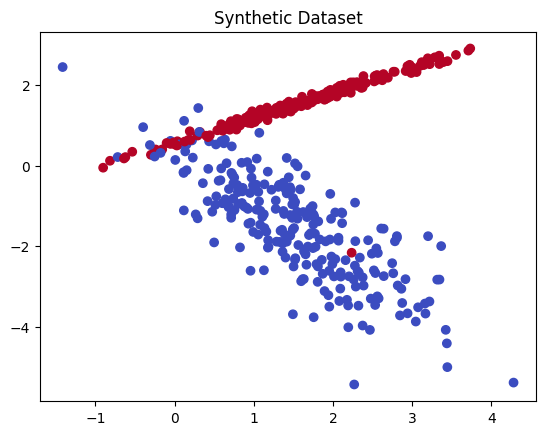

In [ ]:
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')
plt.title("Synthetic Dataset")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9866666666666667
Confusion Matrix:
 [[73  2]
 [ 0 75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.97      1.00      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



# **Synthetic Data - 2**

In [ ]:
data = pd.DataFrame({
    'Age': [56, 46, 32, 25, 38],
    'Annual_Income': [20237, 35056, 129548, 126488, 149415],
    'Spending_Score': [1, 90, 14, 64, 38],
    'Purchase': [0, 0, 0, 1, 0]
})

data


,Age,Annual_Income,Spending_Score,Purchase
0,56,20237,1,0
1,46,35056,90,0
2,32,129548,14,0
3,25,126488,64,1
4,38,149415,38,0


In [ ]:
print(data.isnull().sum())

data = data.fillna(data.mean())


Age               0
Annual_Income     0
Spending_Score    0
Purchase          0
dtype: int64


In [ ]:
X = data[['Age', 'Annual_Income', 'Spending_Score']]
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
max_k = len(X_train)

k_values = range(1, max_k + 1)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} Accuracy={acc}")



K=1 Accuracy=0.5
K=2 Accuracy=1.0
K=3 Accuracy=1.0


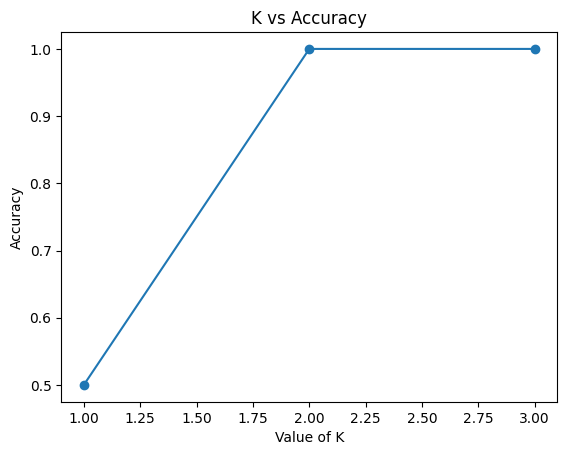

In [ ]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()


In [ ]:
best_k = k_values[np.argmax(accuracy_scores)]
print("Optimal K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Optimal K: 2
Final Accuracy: 1.0
Confusion Matrix:
 [[2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


# **Dataset of customer.csv**

In [ ]:
data = pd.read_csv('customer_data.csv')

data


,Age,Annual_Income,Spending_Score,Purchase
0,56,20237,1,0
1,46,35056,90,0
2,32,129548,14,0
3,25,126488,64,1
4,38,149415,38,0
...,...,...,...,...
395,26,112579,86,1
396,29,57101,85,1
397,18,79323,27,0
398,18,106922,57,1


In [ ]:
print(data.isnull().sum())

data = data.fillna(data.mean())


Age               0
Annual_Income     0
Spending_Score    0
Purchase          0
dtype: int64


In [ ]:
X = data[['Age', 'Annual_Income', 'Spending_Score']]
y = data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
max_k = len(X_train)

k_values = range(1, max_k + 1)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    print(f"K={k} Accuracy={acc}")


K=1 Accuracy=0.95625
K=2 Accuracy=0.91875
K=3 Accuracy=0.95625
K=4 Accuracy=0.9375
K=5 Accuracy=0.95625
K=6 Accuracy=0.95625
K=7 Accuracy=0.95
K=8 Accuracy=0.95
K=9 Accuracy=0.9625
K=10 Accuracy=0.95
K=11 Accuracy=0.95625
K=12 Accuracy=0.95625
K=13 Accuracy=0.95625
K=14 Accuracy=0.95625
K=15 Accuracy=0.95625
K=16 Accuracy=0.94375
K=17 Accuracy=0.94375
K=18 Accuracy=0.94375
K=19 Accuracy=0.95
K=20 Accuracy=0.9375
K=21 Accuracy=0.94375
K=22 Accuracy=0.94375
K=23 Accuracy=0.95
K=24 Accuracy=0.94375
K=25 Accuracy=0.95
K=26 Accuracy=0.95
K=27 Accuracy=0.95
K=28 Accuracy=0.94375
K=29 Accuracy=0.94375
K=30 Accuracy=0.94375
K=31 Accuracy=0.94375
K=32 Accuracy=0.93125
K=33 Accuracy=0.9375
K=34 Accuracy=0.9375
K=35 Accuracy=0.9375
K=36 Accuracy=0.925
K=37 Accuracy=0.94375
K=38 Accuracy=0.93125
K=39 Accuracy=0.9375
K=40 Accuracy=0.93125
K=41 Accuracy=0.925
K=42 Accuracy=0.93125
K=43 Accuracy=0.93125
K=44 Accuracy=0.93125
K=45 Accuracy=0.93125
K=46 Accuracy=0.93125
K=47 Accuracy=0.93125
K=48 Accur

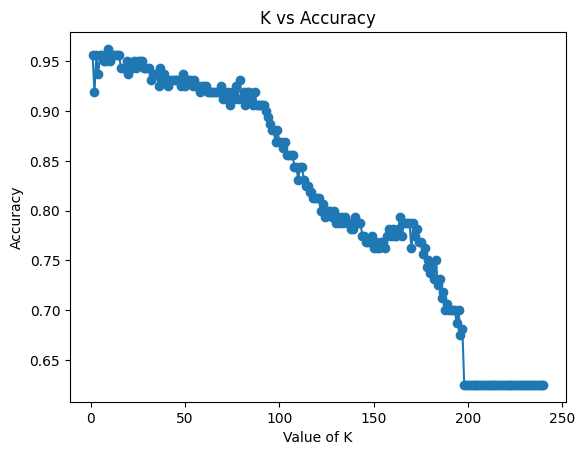

In [ ]:
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.show()


In [ ]:
best_k = k_values[np.argmax(accuracy_scores)]
print("Optimal K:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Optimal K: 9
Final Accuracy: 0.9625
Confusion Matrix:
 [[98  2]
 [ 4 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       100
           1       0.97      0.93      0.95        60

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160

